# Chapter 12 - The Decision Tree

## Listing 12-1. Import the bike data

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 

# Merge the features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

data.head()

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


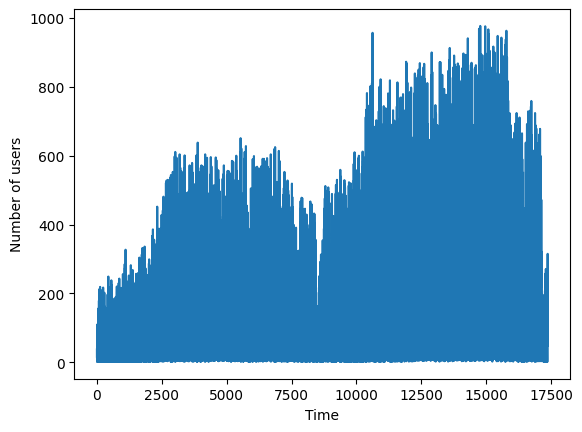

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ax = data['cnt'].plot()
ax.set_ylabel('Number of users')
ax.set_xlabel('Time')
plt.show()

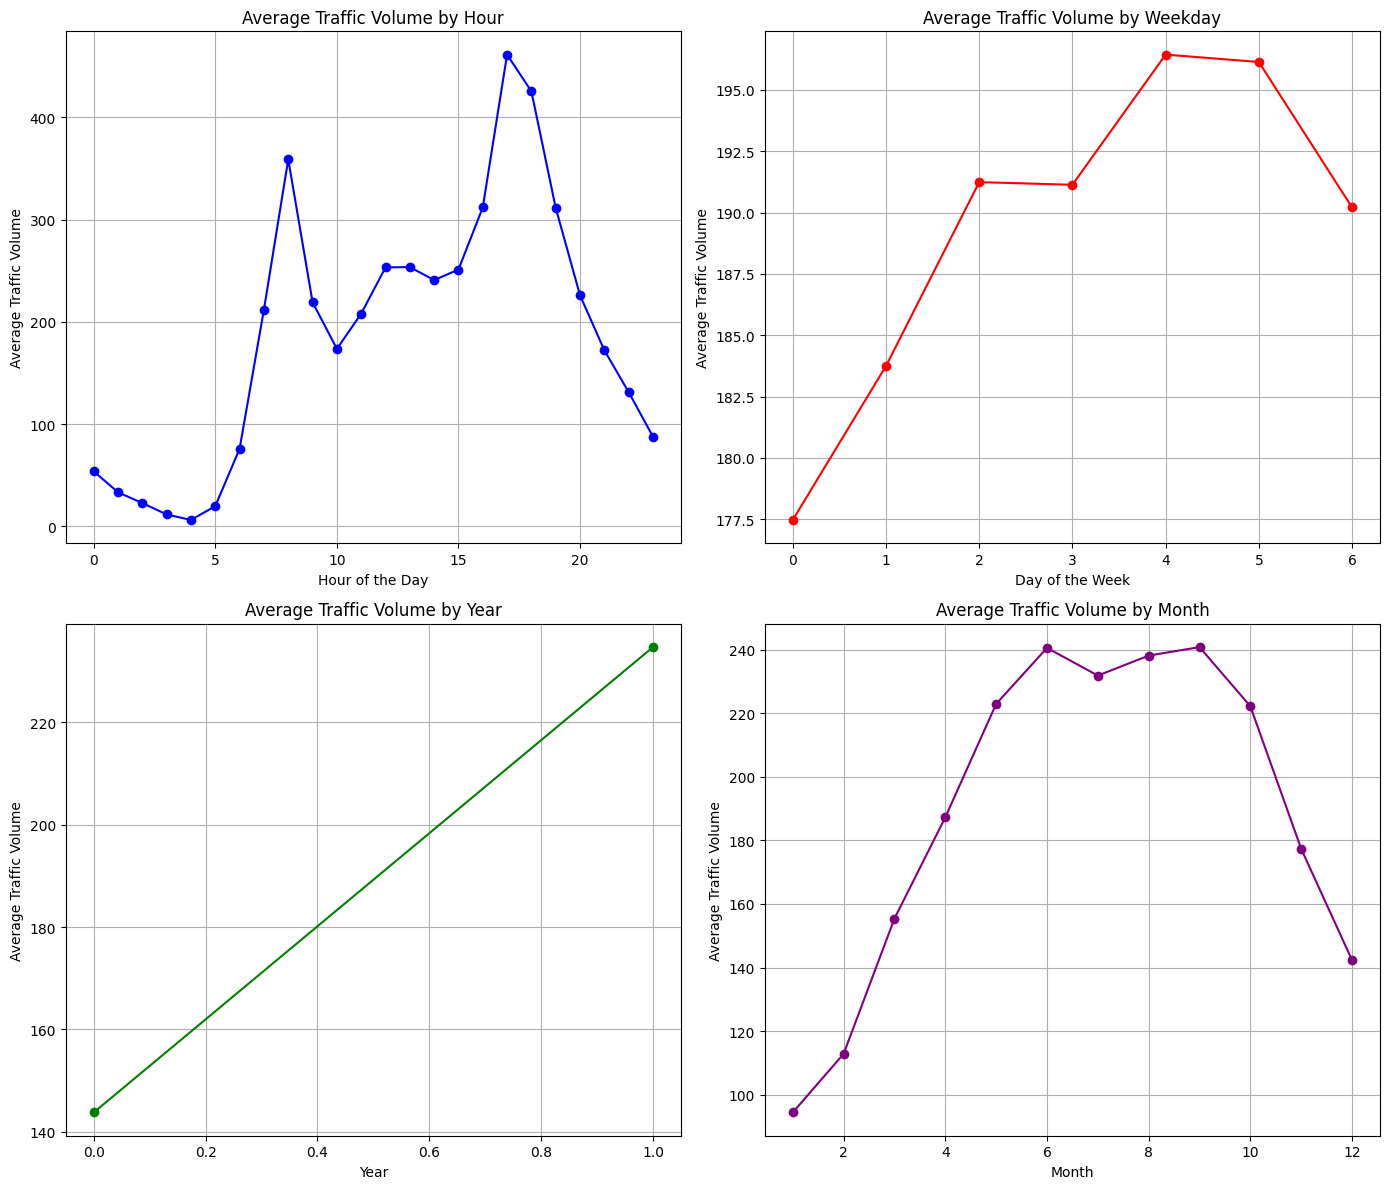

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
# data = pd.read_csv('path_to_your_data.csv')

# Creating a figure with a grid of 2x2 subplots
plt.figure(figsize=(14, 12))

# Plotting 'traffic_volume' against 'hour'
plt.subplot(2, 2, 1)  # Top-left subplot
plt.plot(data.groupby('hr')['cnt'].mean(), marker='o', linestyle='-', color='b')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'weekday'
plt.subplot(2, 2, 2)  # Top-right subplot
plt.plot(data.groupby('weekday')['cnt'].mean(), marker='o', linestyle='-', color='r')
plt.title('Average Traffic Volume by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'year'
plt.subplot(2, 2, 3)  # Bottom-left subplot
plt.plot(data.groupby('yr')['cnt'].mean(), marker='o', linestyle='-', color='g')
plt.title('Average Traffic Volume by Year')
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Plotting 'traffic_volume' against 'month'
plt.subplot(2, 2, 4)  # Bottom-right subplot
plt.plot(data.groupby('mnth')['cnt'].mean(), marker='o', linestyle='-', color='purple')
plt.title('Average Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


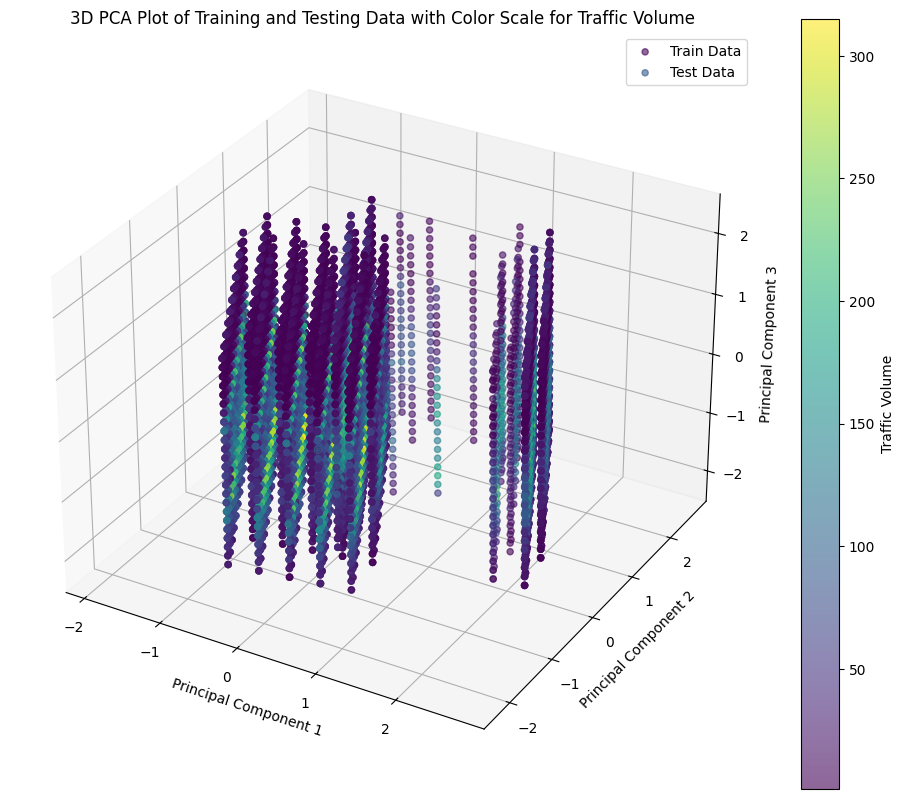

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your data
# data = pd.read_csv('path_to_your_data.csv')
# Example structure of data assumed as mentioned earlier
X = data[['yr', 'mnth', 'weekday', 'hr', 'workingday']]
y = data['cnt']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plotting the results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a color map
cm = plt.get_cmap('viridis')

# Scale the target variable between 0 and 1 for the colormap
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=cm, label='Train Data', alpha=0.6)
sc = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_test, cmap=cm, label='Test Data', alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, ax=ax, label='Traffic Volume')

ax.legend()

plt.title('3D PCA Plot of Training and Testing Data with Color Scale for Traffic Volume')
plt.show()

## Listing 12-2. Creating the training dataset

In [10]:
# 7 last days of user count (autoregression)
data['usersL1'] = data['cnt'].shift(1)
data['usersL2'] = data['cnt'].shift(2)
data['usersL3'] = data['cnt'].shift(3)
data['usersL4'] = data['cnt'].shift(4)
data['usersL5'] = data['cnt'].shift(5)
data['usersL6'] = data['cnt'].shift(6)
data['usersL7'] = data['cnt'].shift(7)

# 7 last days of weathersit
data['weatherL1'] = data['weathersit'].shift(1)
data['weatherL2'] = data['weathersit'].shift(2)
data['weatherL3'] = data['weathersit'].shift(3)
data['weatherL4'] = data['weathersit'].shift(4)
data['weatherL5'] = data['weathersit'].shift(5)
data['weatherL6'] = data['weathersit'].shift(6)
data['weatherL7'] = data['weathersit'].shift(7)

# 7 last days of temperature
data['tempL1'] = data['temp'].shift(1)
data['tempL2'] = data['temp'].shift(2)
data['tempL3'] = data['temp'].shift(3)
data['tempL4'] = data['temp'].shift(4)
data['tempL5'] = data['temp'].shift(5)
data['tempL6'] = data['temp'].shift(6)
data['tempL7'] = data['temp'].shift(7)

# 7 last days of humidity
data['humL1'] = data['hum'].shift(1)
data['humL2'] = data['hum'].shift(2)
data['humL3'] = data['hum'].shift(3)
data['humL4'] = data['hum'].shift(4)
data['humL5'] = data['hum'].shift(5)
data['humL6'] = data['hum'].shift(6)
data['humL7'] = data['hum'].shift(7)

data = data.dropna()
data = data.drop(477)

X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
          'weatherL1', 'weatherL2', 'weatherL3', 'weatherL4', 'weatherL5', 'weatherL6', 'weatherL7',
         'usersL1','usersL2', 'usersL3', 'usersL4', 'usersL5', 'usersL6', 'usersL7',
         'tempL1', 'tempL2', 'tempL3', 'tempL4', 'tempL5', 'tempL6', 'tempL7',
         'humL1', 'humL2','humL3', 'humL4', 'humL5', 'humL6', 'humL7']]

y = data['cnt']


## Listing 12-3. Fitting the model

In [11]:
# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345, shuffle=False)

from sklearn.tree import DecisionTreeRegressor
my_dt = DecisionTreeRegressor(random_state=12345)
my_dt.fit(X_train, y_train)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(my_dt.predict(X_test))))


0.8782118611261032


In [12]:
pip install graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


0.8902377469990679


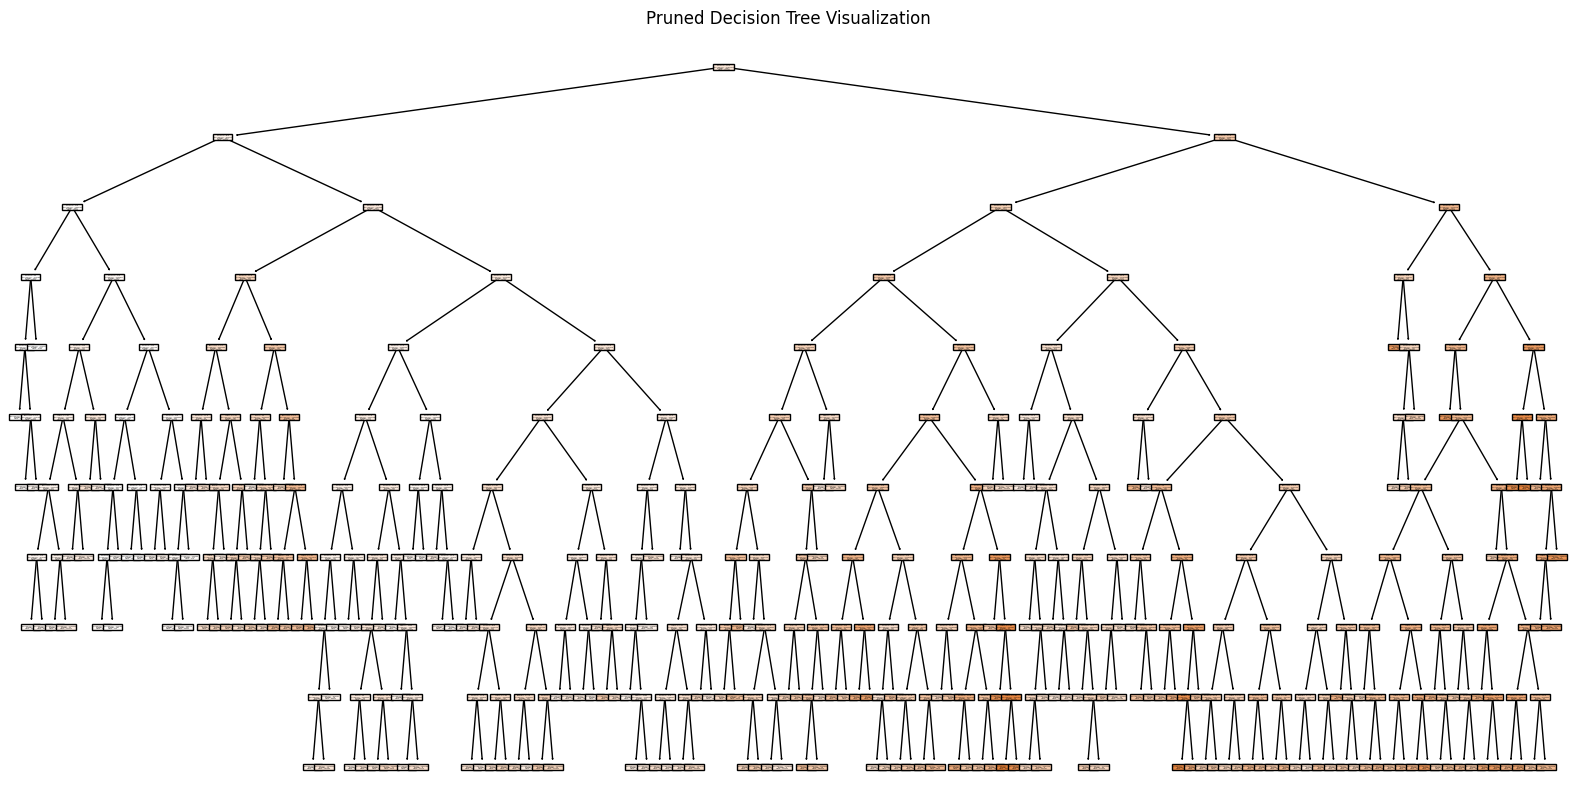

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree

# Assuming you have already prepared X and y from your dataset

# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345, shuffle=False)

from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor with specific parameters to regularize the tree
my_dt = DecisionTreeRegressor(
    max_depth=10,                # Limits depth of the tree
    min_samples_split=15,       # Requires at least 20 samples to consider a split
    min_samples_leaf=5,        # Requires at least 10 samples per leaf
    max_leaf_nodes=200,         # Maximum number of leaf nodes
)
my_dt.fit(X_train, y_train)  # Fit to training data


# Predict and calculate R2 score
predictions = my_dt.predict(X_test)
print(r2_score(y_test, predictions))

# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the size of the plot according to your preference
plot_tree(my_dt, feature_names=X.columns, filled=True)
plt.title('Pruned Decision Tree Visualization')
plt.show()




## Cost complexity Pruning

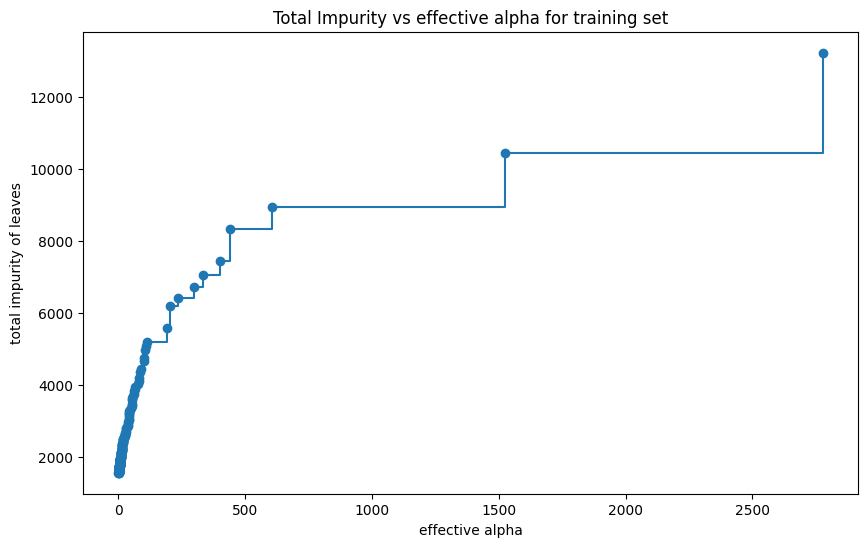

MSE after pruning: 10964.811487153964
MAE after pruning: 67.59328721795409
0.7745128236621124


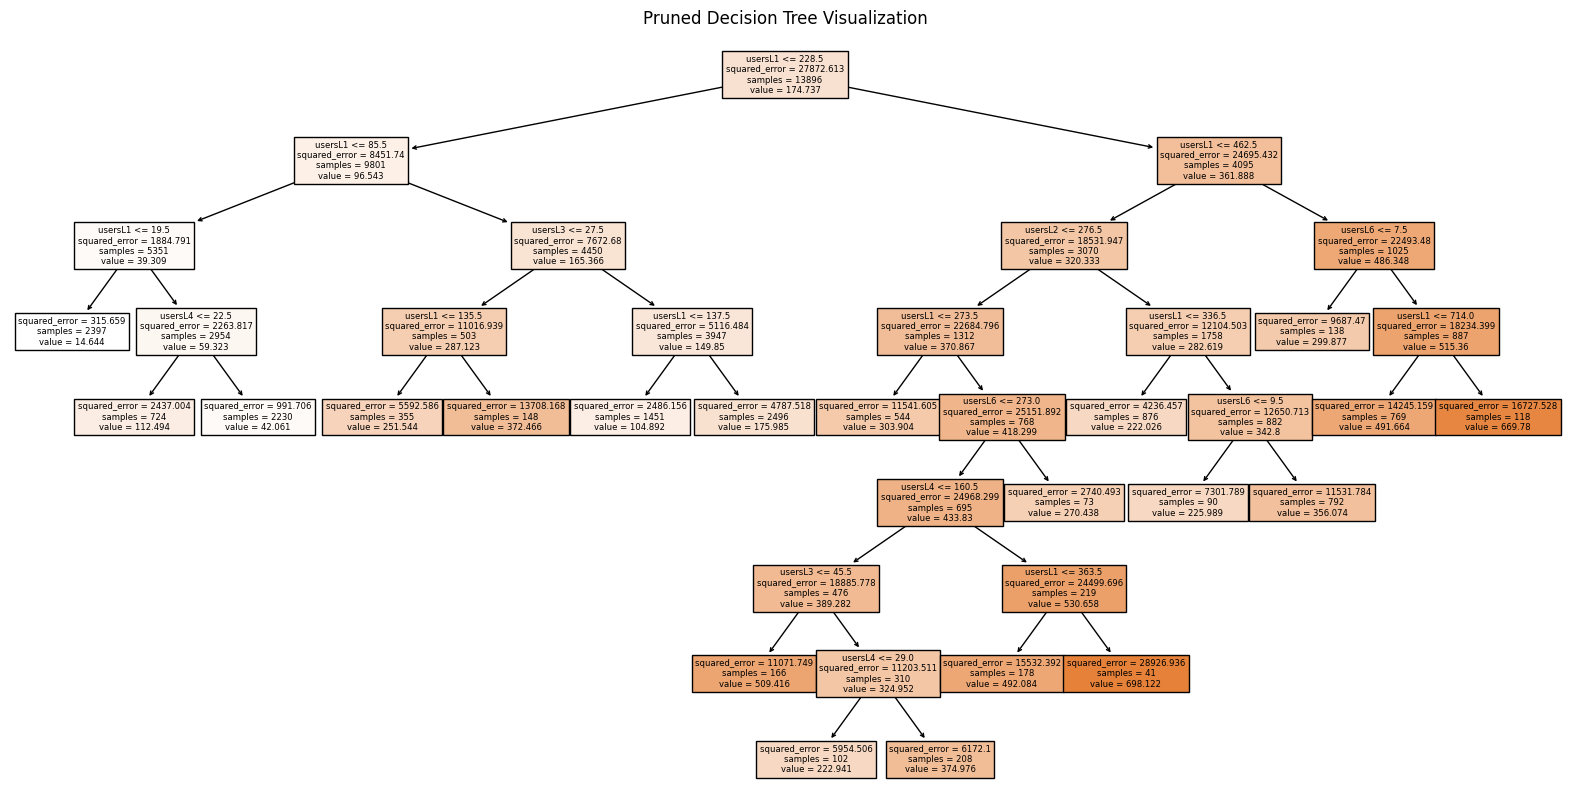

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# Assuming X_train, y_train have been defined
# Initialize the DecisionTreeRegressor with specific parameters to regularize the tree
my_dt = DecisionTreeRegressor(
    max_depth=10,                # Limits depth of the tree
    min_samples_split=15,       # Requires at least 15 samples to consider a split
    min_samples_leaf=5,         # Requires at least 5 samples per leaf
    max_leaf_nodes=200          # Maximum number of leaf nodes
)

# Fit to training data
my_dt.fit(X_train, y_train)

# Get the cost complexity pruning path
path = my_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the ccp_alpha vs impurities
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

# You might choose an alpha value based on this plot or further analysis
# Here we select an alpha somewhere from the plot - this would be updated based on analysis
alpha_selected = ccp_alphas[10]  # Example: select the 10th alpha

# Re-train the tree with the selected alpha
my_dt_pruned = DecisionTreeRegressor(
    random_state=44,
    max_depth=10,
    min_samples_split=15,
    min_samples_leaf=5,
    max_leaf_nodes=20,
    ccp_alpha=20
)
my_dt_pruned.fit(X_train, y_train)

# Evaluate the pruned tree
y_pred = my_dt_pruned.predict(X_test)
print("MSE after pruning:", mean_squared_error(y_test, y_pred))
print("MAE after pruning:", mean_absolute_error(y_test, y_pred))
print(r2_score(list(y_test), list(my_dt_pruned.predict(X_test))))

# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the size of the plot according to your preference
plot_tree(my_dt_pruned, feature_names=X.columns, filled=True)
plt.title('Pruned Decision Tree Visualization')
plt.show()



## Listing 12-4. Adding a grid search

In [37]:
from sklearn.model_selection import GridSearchCV

my_dt = GridSearchCV(DecisionTreeRegressor(random_state=44), 
                 {'min_samples_split': list(range(20,50, 2)),
                 'max_features': [0.6, 0.7, 0.8, 0.9, 1.],
                 'criterion': ['squared_error', 'absolute_error']},
                scoring = 'r2', n_jobs = -1)

my_dt.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_dt.predict(X_test))))


KeyboardInterrupt: 

## Listing 12-5. Finding the best parameters

In [ ]:
print(my_dt.best_estimator_)

## Listing 12-6. Plotting the prediction

In [ ]:
fcst = my_dt.predict(X_test)

plt.plot(list(fcst))
plt.plot(list(y_test))
plt.ylabel('Sales')
plt.xlabel('Time')
plt.show()


## Listing 12-7. Plotting the prediction

In [ ]:
from sklearn.tree import plot_tree
plot_tree(my_dt.best_estimator_, max_depth=1)
plt.show()
